<a href="https://colab.research.google.com/github/GalinaLebedeva/Contacts-Search/blob/main/Contacts_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np 

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Копия train.tar', compression = 'infer')

Откроем датасет, посмотрим его размер и выведем его первые  и последние 5 строк

In [6]:
data.shape

(984488, 9)

In [7]:
data.head()

,train.csv,description,subcategory,category,price,region,city,datetime_submitted,is_bad
0,Диван-кровать,Продаем диван-кровать. Удобный механизм - евро...,Мебель и интерьер,Для дома и дачи,7000.0,Россия,Москва,2019-06-01 00:00:15.180656,0.0
1,Кожух рулевой колонки Даф хф 91 4509834,Кожух рулевой колонки DAF XF 94 (60066004)/\n ...,Запчасти и аксессуары,Транспорт,2290.0,Россия,Москва,2019-06-01 00:00:44.317933,0.0
2,Дешёвый буст аккаунтов Dota 4,! Буст аккаунтов с ммр выше 1000ммр не беру ! ...,Предложение услуг,Услуги,200.0,Северная Осетия,Владикавказ,2019-06-01 00:00:50.249692,1.0
3,Телевизор sharp.Смарт тв.Интернет,Продам телевизор . Диагональ 450.наличие входа...,Аудио и видео,Бытовая электроника,25000.0,Калининградская область,Советск,2019-06-01 00:00:50.325799,1.0
4,Открытка-конверт,Открытки-конверты ручной работы/\nВыполнены в ...,Коллекционирование,Хобби и отдых,150.0,Ставропольский край,Ессентукская,2019-06-01 00:00:56.632655,0.0


In [8]:
data.tail()

,train.csv,description,subcategory,category,price,region,city,datetime_submitted,is_bad
984483,Juul,Зарядка и под в комплекте.,Коллекционирование,Хобби и отдых,1200.0,Россия,Москва,2019-10-09 23:56:13.283059,0.0
984484,Белый стул IKEA,Белый стул Ikea /\nСостояние требует ремонта: ...,Мебель и интерьер,Для дома и дачи,500.0,Россия,Санкт-Петербург,2019-10-09 23:58:42.377241,0.0
984485,"5-к квартира, 32 м², 2/2 эт.",Бронирование с октября по январь 1010 г./\n ...,Квартиры,Недвижимость,800.0,Калининградская область,Калининград,2019-10-09 23:59:26.744680,0.0
984486,"Репетитор по математике, подготовка к огэ",Основное и самое любимое направление моей рабо...,Предложение услуг,Услуги,1300.0,Московская область,Балашиха,2019-10-09 23:59:41.342367,1.0
984487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Переименуем колонку traim.csv

In [9]:
data = data.rename(columns = {'train.csv':'title'})

Удалим строку с пропусками

In [10]:
data = data.drop(984487, axis = 0)

Изменим тип данных в столбце `datetime_submitted`

In [11]:
data['datetime_submitted'] = pd.to_datetime(data['datetime_submitted'])

Выведем основную информацию о датасете, посмотрим в каких колонках у нас есть пропуски

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984487 entries, 0 to 984486
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   title               984487 non-null  object        
 1   description         984487 non-null  object        
 2   subcategory         984487 non-null  object        
 3   category            984487 non-null  object        
 4   price               926439 non-null  float64       
 5   region              984487 non-null  object        
 6   city                984487 non-null  object        
 7   datetime_submitted  984487 non-null  datetime64[ns]
 8   is_bad              984487 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 75.1+ MB


In [13]:
data.isna().sum()

title                     0
description               0
subcategory               0
category                  0
price                 58048
region                    0
city                      0
datetime_submitted        0
is_bad                    0
dtype: int64

In [14]:
data[data['price'].isna()]

,title,description,subcategory,category,price,region,city,datetime_submitted,is_bad
22,Монтаж отопления гвс. хвс. установка сантехники,Несколько вариантов разводки системы отопления...,Предложение услуг,Услуги,NaN,Смоленская область,Вязьма,2019-06-01 00:06:52.358883,0.0
47,Обучение.Удостоворение.Электробезопасность.охрана,5. Аттестация сотрудников: рабочего пер...,Предложение услуг,Услуги,NaN,Россия,Москва,2019-06-01 00:13:49.892272,0.0
113,Автомобиль в разборе: Citroen Berlingo 2002-2008,В наличии Автомобиль в разборе:/\n/\nCitroen B...,Запчасти и аксессуары,Транспорт,NaN,Россия,Москва,2019-06-01 00:39:31.479077,0.0
125,Квартира в рассрочку,Есть возможность приобретения квартиры на терр...,Предложение услуг,Услуги,NaN,Магаданская область,Магадан,2019-06-01 00:44:13.808647,1.0
129,Колёса,"Продуется колеса с дисками штампованными , плю...",Запчасти и аксессуары,Транспорт,NaN,Чеченская Республика,Грозный,2019-06-01 00:45:39.741722,1.0
...,...,...,...,...,...,...,...,...,...
984404,Малыши из подвала очень хотят домой,❗❗❗СРОЧНО❗❗❗МАЛЫШИ ИЗ ПОДВАЛА ИЩУТ ДОМ❗/\n(пос...,Собаки,Животные,NaN,Калининградская область,Калининград,2019-10-09 23:14:49.807021,1.0
984424,Наращивание ресниц,К вашим услугам предоставляю наращивание ресни...,Предложение услуг,Услуги,NaN,Ставропольский край,Ставрополь,2019-10-09 23:27:39.434247,1.0
984438,Отдам котёнка в добрые руки,Отдадим котёнка (кошечку) Элли в добрые руки! ...,Кошки,Животные,NaN,Россия,Москва,2019-10-09 23:33:33.467176,1.0
984439,Обмен монет и купюр,То что есть: 40 рублей 6000г: 55 лет Победы +4...,Коллекционирование,Хобби и отдых,NaN,Ивановская область,Иваново,2019-10-09 23:33:41.475859,0.0


Пропуски в колонке `price` не имеет смысла трогать, а вот по столбцу `region` есть вопросы, например регион Россия, в состав которой входит только Москва и Санкт-Петербург, и отдельный регион Москва и отдельный Санкт_петербург, поэтому принято решения устанить этот неявный дубликат и приравнять все регионы, где указана Россия к столбцу `city`

In [15]:
data[data['region'] == 'Россия']['city'].unique()

array(['Москва', 'Санкт-Петербург'], dtype=object)

In [16]:
data.loc[(data['region'] == 'Россия', 'region')] = data['city']

Проверим

In [17]:
data['region'].value_counts()

Москва                 159557
Санкт-Петербург         83130
Краснодарский край      52960
Московская область      50261
Татарстан               33361
                        ...  
Магаданская область       503
Тыва                      190
Сахалинская область       168
Ненецкий АО                60
Чукотский АО               27
Name: region, Length: 84, dtype: int64

Посмотрим на распределение объявлений по категориям, самой многочисленной категорией является "Транспорт", а самой маленькой "Для бизнеса"

In [18]:
data['category'].value_counts()

Транспорт              209221
Личные вещи            199655
Бытовая электроника    152132
Для дома и дачи        132120
Недвижимость           100796
Хобби и отдых           64295
Услуги                  56681
Животные                31421
Работа                  26208
Для бизнеса             11958
Name: category, dtype: int64

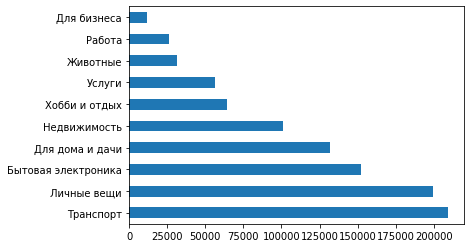

In [19]:
data['category'].value_counts().plot(kind = 'barh')

Посмотрим также на колонку `is_bad`, эта колонка показывает нам, что в объявлении указан номер телефона, что плохо для работы сайта, 25% объявлений содержат номер телефона, но нужно это проверить. Самой многочисленной категорией, где указывают номер телефона у нас в категории "Транспорт"

In [20]:
data['is_bad'].value_counts()

0.0    746221
1.0    238266
Name: is_bad, dtype: int64

In [21]:
data['is_bad'].value_counts(normalize = True)

0.0    0.75798
1.0    0.24202
Name: is_bad, dtype: float64

In [22]:
data.groupby('category')['is_bad'].value_counts()

category             is_bad
Бытовая электроника  0.0       131122
                     1.0        21010
Для бизнеса          0.0        10209
                     1.0         1749
Для дома и дачи      0.0       102033
                     1.0        30087
Животные             1.0        17159
                     0.0        14262
Личные вещи          0.0       172146
                     1.0        27509
Недвижимость         0.0        64102
                     1.0        36694
Работа               0.0        15868
                     1.0        10340
Транспорт            0.0       154408
                     1.0        54813
Услуги               1.0        28430
                     0.0        28251
Хобби и отдых        0.0        53820
                     1.0        10475
Name: is_bad, dtype: int64

Проверим колонку `is_bad` при помощи регулярных выражений. Применим метод `contains`, который выдаст булевые значения. Создадим новые столбцы для каждого регулярного выражения

In [23]:
import re

Поск будем осуществлять по строкам столбца `description`

In [24]:
data['description']

0         Продаем диван-кровать. Удобный механизм - евро...
1         Кожух рулевой колонки DAF XF 94 (60066004)/\n ...
2         ! Буст аккаунтов с ммр выше 1000ммр не беру ! ...
3         Продам телевизор . Диагональ 450.наличие входа...
4         Открытки-конверты ручной работы/\nВыполнены в ...
                                ...                        
984482    +79780979761/\nДенис/\nширину обода и вылет на...
984483                           Зарядка и под в комплекте.
984484    Белый стул Ikea /\nСостояние требует ремонта: ...
984485    Бронирование с октября по январь 1010 г./\n   ...
984486    Основное и самое любимое направление моей рабо...
Name: description, Length: 984487, dtype: object

После каждого применения регулярного выражения, я проверяю количество найденных совпадений

In [25]:
data['reg1'] = data['description'].str.contains(r'(\+7|8\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D)')

<ipython-input-25-8b90d72a16cb>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data['reg1'] = data['description'].str.contains(r'(\+7|8\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D\d\D)')


In [26]:
data['reg1'].value_counts()

False    956325
True      28162
Name: reg1, dtype: int64

In [27]:
data['regex2'] = data['description'].str.contains(r'(\+7\D\d{3}\D\d{3}(?:-\d{2})(?:-\d{2}))')

<ipython-input-27-d615dc3f04c5>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data['regex2'] = data['description'].str.contains(r'(\+7\D\d{3}\D\d{3}(?:-\d{2})(?:-\d{2}))')


In [28]:
data['regex2'].value_counts()

False    981002
True       3485
Name: regex2, dtype: int64

In [29]:
data['regex3'] = data['description'].str.contains(r'(\d{10})') 

<ipython-input-29-92845fa14e23>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data['regex3'] = data['description'].str.contains(r'(\d{10})')


In [30]:
data['regex3'].value_counts()

False    823656
True     160831
Name: regex3, dtype: int64

In [31]:
data['regex4'] = data['description'].str.contains(r'((\+7|8)(-\d{2,3}){4})') 


<ipython-input-31-e29e5544df85>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data['regex4'] = data['description'].str.contains(r'((\+7|8)(-\d{2,3}){4})')


In [32]:
data['regex4'].value_counts()

False    976209
True       8278
Name: regex4, dtype: int64

In [33]:
data['regex5'] = data['description'].str.contains(r'vk', flags = re.IGNORECASE)

In [34]:
data['regex5'].value_counts()

False    977667
True       6820
Name: regex5, dtype: int64

In [35]:
data['regex6'] = data['description'].str.contains(r'viber', flags = re.IGNORECASE)

In [36]:
data['regex6'].value_counts()

False    960057
True      24430
Name: regex6, dtype: int64

In [42]:
data['regex'] = data[['reg1','regex2','regex3','regex4','regex5','regex6']].max(1).astype(int)

После создания 6 столбцов для регулярных выражений, соберем данные в один столбец, где в столбцах с регулярными выражениями, если есть хотя бы одно значение `True`, то у нового столбца тоже будет значение `True`. Посмотрим на нашу таблицу

In [38]:
data

,title,description,subcategory,category,price,region,city,datetime_submitted,is_bad,reg1,regex2,regex3,regex4,regex5,regex6,regex
0,Диван-кровать,Продаем диван-кровать. Удобный механизм - евро...,Мебель и интерьер,Для дома и дачи,7000.0,Москва,Москва,2019-06-01 00:00:15.180656,0.0,False,False,False,False,False,False,False
1,Кожух рулевой колонки Даф хф 91 4509834,Кожух рулевой колонки DAF XF 94 (60066004)/\n ...,Запчасти и аксессуары,Транспорт,2290.0,Москва,Москва,2019-06-01 00:00:44.317933,0.0,False,False,False,False,False,False,False
2,Дешёвый буст аккаунтов Dota 4,! Буст аккаунтов с ммр выше 1000ммр не беру ! ...,Предложение услуг,Услуги,200.0,Северная Осетия,Владикавказ,2019-06-01 00:00:50.249692,1.0,False,False,False,False,True,False,True
3,Телевизор sharp.Смарт тв.Интернет,Продам телевизор . Диагональ 450.наличие входа...,Аудио и видео,Бытовая электроника,25000.0,Калининградская область,Советск,2019-06-01 00:00:50.325799,1.0,False,False,False,False,False,False,False
4,Открытка-конверт,Открытки-конверты ручной работы/\nВыполнены в ...,Коллекционирование,Хобби и отдых,150.0,Ставропольский край,Ессентукская,2019-06-01 00:00:56.632655,0.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984482,Штампы 61r,+79780979761/\nДенис/\nширину обода и вылет на...,Запчасти и аксессуары,Транспорт,2000.0,Крым,Мирное,2019-10-09 23:55:54.099019,1.0,True,False,True,False,False,False,True
984483,Juul,Зарядка и под в комплекте.,Коллекционирование,Хобби и отдых,1200.0,Москва,Москва,2019-10-09 23:56:13.283059,0.0,False,False,False,False,False,False,False
984484,Белый стул IKEA,Белый стул Ikea /\nСостояние требует ремонта: ...,Мебель и интерьер,Для дома и дачи,500.0,Санкт-Петербург,Санкт-Петербург,2019-10-09 23:58:42.377241,0.0,False,False,False,False,False,False,False
984485,"5-к квартира, 32 м², 2/2 эт.",Бронирование с октября по январь 1010 г./\n ...,Квартиры,Недвижимость,800.0,Калининградская область,Калининград,2019-10-09 23:59:26.744680,0.0,False,False,False,False,False,True,True


Теперь можно сравнить значения в столбце `is_bad` и значения в столбце `regex`. Количество записей отличается не намного, но оличается, что говорит о возможности усовершенствования регулярных выражений в дальнейшем

In [39]:
data.is_bad.value_counts()

0.0    746221
1.0    238266
Name: is_bad, dtype: int64

In [43]:
data.regex.value_counts()

0    780285
1    204202
Name: regex, dtype: int64

In [47]:
data.groupby(['is_bad','regex']).title.count()

is_bad  regex
0.0     0        661320
        1         84901
1.0     0        118965
        1        119301
Name: title, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(data.is_bad,data.regex)

0.7929215926670439